# **End-to-End Machine Learning Project**

Στην εργασία αυτή γίνεται εφαρμογή αλγόριθμων
κατηγοριοποίησης (classification algorithms) για ένα πραγματικό σύνολο δεδομένων.

Τα σύνολα δεδομένων που θα χρησιμοποιηθούν για την εργασία παρέχονται από το
UCI Machine Learning Repository (https://archive.ics.uci.edu/).

Με βάση το τελευταίο ψηφίο του Αριθμού Μητρώου, γίνεται χρήση του Συνόλου Δεδομένων Mammographic Mass Data Set (https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)


## **Εισαγωγή δεδομένων**
Για την ευκολότερη διαχείριση των δεδομένων μας θα χρησιμοποιήσουμε την της Python βιβλιοθήκη η οποία ονομάζεται Pandas.

In [ ]:
import pandas as pd
import numpy as np

# Put data (mammographic_masses.data) in a dataframe

# Path
path = 'sample_data/mammographic_masses.data'
df = pd.read_csv(path)

# Insert column headings
df.columns = ['BIRADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

# View data
df

,BIRADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0
...,...,...,...,...,...,...
955,4,47,2,1,3,0
956,4,56,4,5,3,1
957,4,64,4,5,3,0
958,5,66,4,5,3,1


Στα δεδομένα μας υπάρχουν ελλιπείς τιμές (missing values).

Αυτές εμφανίζονται με "?".

Για τις ελλιπείς τιμές, οι πιο συνηθισμένοι τρόποι αντιμετώπισης είναι:


*   εξάλειψη των αντικειμένων που έχουν ελλιπείς τιμές από τα επόμενα βήματα ανάλυσης
*   εκτίμηση των ελλιπών τιμών και συμπλήρωσή τους
* παράβλεψη της ελλιπούς τιμής κατά την ανάλυση
* αντικατάσταση με όλες τις πιθανές τιμές με κάποιο βάρος που προκύπτει από την πιθανότητα εμφάνισής τους

Στην περίπτωση αυτή κάθε σειρά που είχε missing value "εξαλειφεται".  


In [ ]:
# Elimination of rows with missing values
for v in ["BIRADS", "Age", "Shape", "Margin", "Density", "Severity"]:
  df = df.loc[df[v]!='?']

# View data
df

,BIRADS,Age,Shape,Margin,Density,Severity
1,5,58,4,5,3,1
2,4,28,1,1,3,0
7,5,57,1,5,3,1
9,5,76,1,4,3,1
10,3,42,2,1,3,1
...,...,...,...,...,...,...
955,4,47,2,1,3,0
956,4,56,4,5,3,1
957,4,64,4,5,3,0
958,5,66,4,5,3,1


## **Οπτικοποίηση των δεδομένων**

Η οπτικοποίηση των δεδομένων εξυπηρετεί στην βαθύτερη κατανόηση τους καθώς με τα διάφορα γραφήματα αποτυπώνονται ευκολότερα οι τάσεις και οι κατανομές που ακολουθούν τα δεδομένα επιτρέποντας τη γρηγορότερη ποιοτική εκτίμηση τους.

Για τον σκοπό αυτό έγινε χρήση κυρίως της βιβλιοθήκης της Python, Matplotlib αλλά και της Seaborn η οποία βασίζεται επίσης στη Matplotlib.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Ιστογράμματα των στηλών**
Για την εκτίμηση των δεδομένων μας ένας τρόπος είναι η δημιουργία ιστογραμμάτων που προσφέρουν μια πολύ καλή αίσθηση των κατανομών που ακολουθούν οι διάφορετικές στήλες ενός data frame.


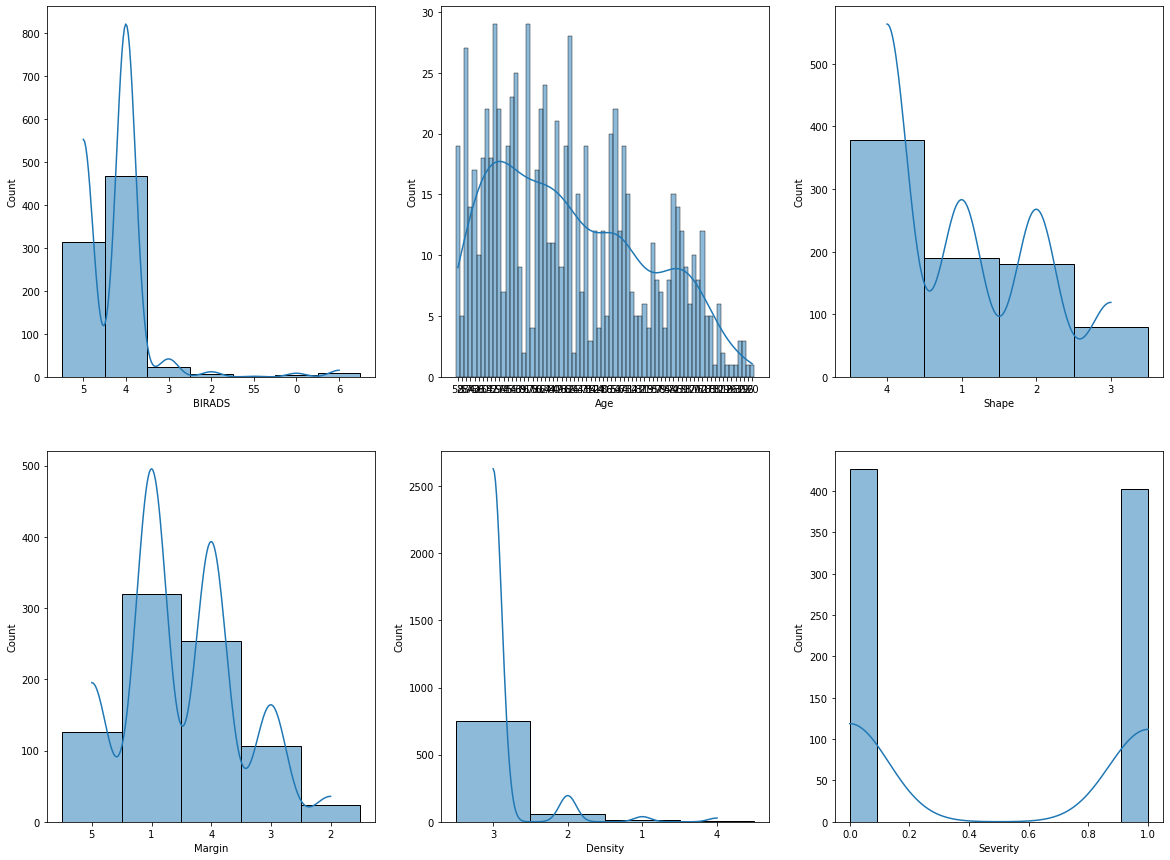

In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

i=0
for column in df:
  sns.histplot(data=df, x=column, kde=True, ax=axes[i//3,i%3])
  i+=1

## **Προεπεξεργασία δεδομένων**

Για την προετοιμασία των δεδομένων ένας απο τους πιο χρήσιμους μετασχηματισμούς είναι η κλιμάκωση των δεδομένων.

Γίνεται χρήση της συνάρτησης StandardScaler() της scikit-learn.

In [ ]:
# Standardise the variables
from sklearn.preprocessing import StandardScaler

scaled_columns = StandardScaler().fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=df.columns)

## **Εύρεση της συσχέτισης μεταξύ των μεταβλητών**
Για την εύρεση της συσχέτισης μεταξύ των στηλών του data frame μπορούμε να υπολογίσουμε το συντελεστή γραμικής συσχέτισης (συντελεστής Pearson).

Ο συγκεκριμένος συντελεστής μπορεί να εκτιμήσει το βαθμό γραμμικής συσχέτισης μεταξύ των μεταβλητών και κυμαίνεται μεταξύ του -1 (πλήρης αρνητική γραμμική συσχέτιση) μέχρι το +1 (πλήρης θετική γραμμική συσχέτιση), με την τιμή μηδέν να αντιστοιχεί σε μη συσχετισμένες μεταβλητές γραμμικά.


Ειδικά για το παράδειγμα μας προκύπτει ότι το BI-RADS assessment έχει την υψηλότερη συσχέτιση με το Severity σε σχέση με τις υπόλοιπες ανεξάρτητες μεταβλητές.

Για τον υπολογισμό της συσχέτισης μεταξύ των διαφορετικών στηλών - μεταβλητών χρησιμοποιείται η συνάρτηση corr() της Pandas.

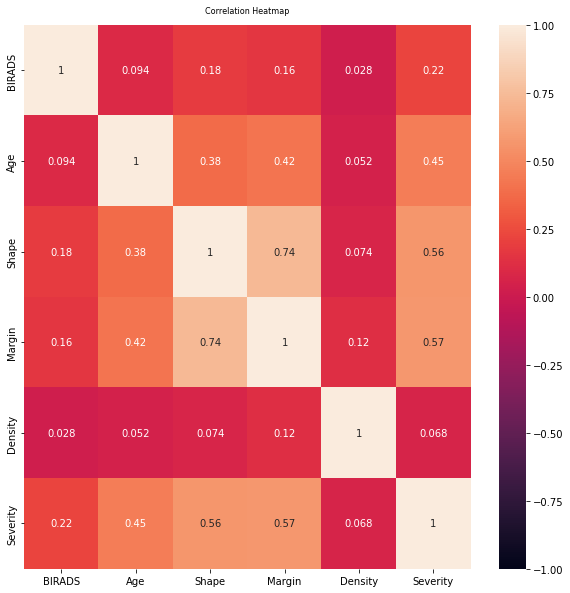

In [ ]:
# plot the correlation coefficient between variables scaled in -1,1

plt.figure(figsize=(10, 10))

# Store heatmap object in a variable
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
heatmap = sns.heatmap(scaled_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)
plt.show()

Για τη διερεύνηση της συσχέτισης μεταξύ δύο μεταβλητών, ένας δεύτερος τρόπος είναι να δημιουργήσουμε ένα διάγραμμα διασποράς όπου απεικονίζουμε ζεύγη παρατηρήσεων.

Έτσι μπορούμε να αναπαραστήσυμε γραφικά τη συσχέτιση τους.

Με τον τρόπο αυτό παρατηρώντας γραφικά τη συσχέτιση μεταξύ δύο μεταβλητών, μπορούμε να επιβεβαιώσουμε τα συμπεράσματα που προέκυψαν απο το προηγούμενο διάγραμμα αλλά και να επεκτείνουμε τα συμπεράσματα σε περιπτώσεις μη γραμμικής συσχέτισης μεταξύ των μεταβλητών.

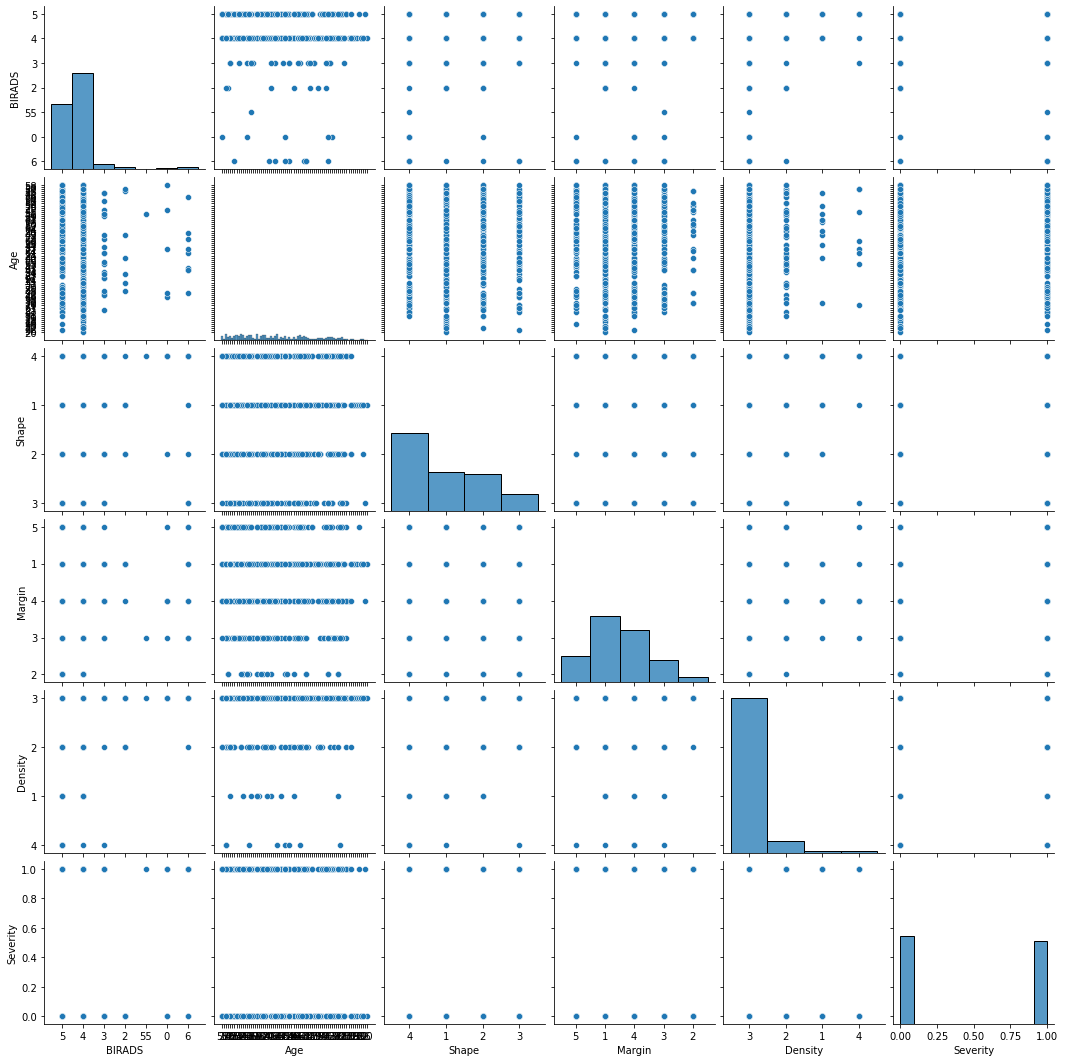

In [ ]:
# Pairplots of the variables in the dataframe
sns.pairplot(data=df, vars=df.columns)

## **Δημιουργία συνόλων εκπαίδευσης και ελέγχου**



Ορισμός του συνόλου εκπαίδευσης που θα χρησιμοποιηθεί για την εκπαίδευση του αλγορίθμου έτσι ώστε να ανταποκρίνεται με σωστό τρόπο σε μελλοντικά δεδομένα καθώς και ο ορισμός του συνόλου ελέγχου που θα χρησιμοποιηθεί ώστε να ελεγχθεί η συγκεκριμένη αποτελεσματικότητα.



Εδώ γίνεται χρήση της train_test_split() περνώντας μία συγκεκριμένη τιμή στην παράμετρο random_state προκειμένου κάθε φορά που εκτελώ το πρόγραμμα να γίνεται ο διαχωρισμός του συνόλου δεδομένων σε δεδομένα εκπαίδευσης και δεδομλενα ελέγχου με τον ίδιο ακριβώς τρόπο.


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(scaled_df, test_size=.4, random_state=42)

predictors_train = train_set.drop('Severity', axis=1)

labels_train = df.loc[predictors_train.index,'Severity']

predictors_test = test_set.drop('Severity', axis=1)

labels_test = df.loc[predictors_test.index,'Severity']

Ξεκινάμε εκπαιδεύοντας το μοντέλο μας με χρήση του training set, predictors_train και labels_train.

Έπειτα το δοκιμάζουμε χρησιμοποιώντας τα δεδομένα του training set προκειμένου να έχουμε μια πρώτη εκτίμηση της απόδοσής του.

Έδω γίνεται χρήση K Nearest Neighbors Classification (KNN)

In [ ]:
# KNearestNeighbors Classification
from matplotlib.cbook import print_cycles
from sklearn import neighbors, metrics

knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

# Train Model
knn.fit(predictors_train, labels_train)

prediction = knn.predict(predictors_test)

print("----------- KNearestNeighbors Classification -----------")
print(metrics.classification_report(labels_test, prediction))

----------- KNearestNeighbors Classification -----------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       175
           1       0.77      0.84      0.80       157

    accuracy                           0.81       332
   macro avg       0.81      0.81      0.81       332
weighted avg       0.81      0.81      0.81       332



Έδω γίνεται χρήση Support Vector Machines Classification (SVM)

In [ ]:
# Support Vector Machines Classification
from sklearn import svm, metrics

model = svm.SVC()

# Train Model
model.fit(predictors_train, labels_train)

prediction = model.predict(predictors_test)

print("-------- Support Vector Machines Classification --------")
print(metrics.classification_report(labels_test, prediction))

-------- Support Vector Machines Classification --------
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       175
           1       0.79      0.88      0.83       157

    accuracy                           0.83       332
   macro avg       0.84      0.84      0.83       332
weighted avg       0.84      0.83      0.83       332



Έδω γίνεται χρήση Decision Trees Classification

In [ ]:
# Decision Trees Classification
from sklearn import tree, metrics

dtree = tree.DecisionTreeClassifier()

# Train Model
dtree = dtree.fit(predictors_train, labels_train)

prediction = dtree.predict(predictors_test)

print("------------- Decision Trees Classification -------------")
print(metrics.classification_report(labels_test, prediction))

------------- Decision Trees Classification -------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       175
           1       0.82      0.76      0.79       157

    accuracy                           0.80       332
   macro avg       0.81      0.80      0.80       332
weighted avg       0.80      0.80      0.80       332



Έδω γίνεται χρήση Stochastic Gradient Descent Classification (SGD)

In [ ]:
# Stochastic Gradient Descent Classification
from sklearn import metrics
from sklearn.linear_model import SGDClassifier

sgdmodel = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

# Train Model
sgdmodel.fit(predictors_train, labels_train)

sgdprediction = sgdmodel.predict(predictors_test)

print("---------- Stochastic Gradient Descent Classification ----------")
print(metrics.classification_report(labels_test, prediction))

Έδω γίνεται χρήση Random Forest Classification

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier(n_estimators=10)

# Train Model
rfc = rfc.fit(predictors_train, labels_train)

prediction = rfc.predict(predictors_test)

print("------------- Random Forest Classification -------------")
print(metrics.classification_report(labels_test, prediction))

------------- Random Forest Classification -------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       175
           1       0.79      0.82      0.80       157

    accuracy                           0.81       332
   macro avg       0.81      0.81      0.81       332
weighted avg       0.81      0.81      0.81       332



Με βάση τις τιμές, το μοντέλο Support Vector Machines φαίνεται να έχει πολύ καλύτερη απόδοση σε σχέση με τα προηγούμενα μοντέλα.

K Nearest Neighbors Classification accuracy: 0.81

Support Vector Machines Classification accuracy: 0.83

Decision Trees Classification accuracy:  0.80

Stochastic Gradient Descent Classification accuracy:  0.80

Random Forest Classification accuracy: 0.81 (παρατηρήθηκαν και κάποιες αποκλίσεις)